In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [41]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING logs from TensorFlow

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [85]:
import os
import cv2
import numpy as np

X_train = [] 
Y_train = [] 
image_size = 224
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Load training data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

# Load testing data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)




In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle 
import tensorflow as tf

In [86]:
from sklearn.utils import shuffle

# Shuffle the dataset
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check shape
print(X_train.shape)


(3264, 224, 224, 3)


In [35]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Optional: Check the shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (2643, 150, 150, 3)
Test set: (294, 150, 150, 3)


In [8]:
print(y_train[:5])


['glioma_tumor' 'meningioma_tumor' 'meningioma_tumor' 'glioma_tumor'
 'pituitary_tumor']


In [37]:


# Define your label list
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Convert string labels to numeric only if they are still strings
if isinstance(y_train[0], str):
    y_train = [labels.index(i) for i in y_train]
    y_test = [labels.index(i) for i in y_test]

# One-hot encode
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=len(labels))
Y_test = to_categorical(y_test, num_classes=len(labels))


In [38]:
model =Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))




In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 120)    │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       276,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,370,404 (16.67 MB)

 Trainable params: 4,370,404 (16.67 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
print(type(X_train))
print(X_train[:5])  # or df.head() if it's a DataFrame


<class 'numpy.ndarray'>
[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [2 2 2]
   [2 2 2]
   [2 2 2]]

  ...

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [3 3 3]
   [5 5 5]
   [3 3 3]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [3 3 3]
   [3 3 3]
   [3 3 3]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0

In [66]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',  # ✅ correct string
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)


Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Found 2870 files belonging to 4 classes.
Using 287 files for validation.


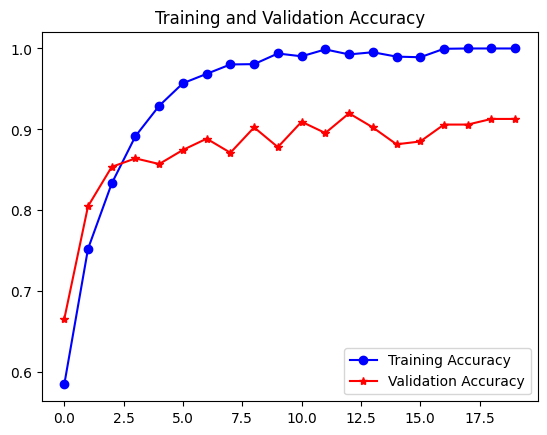

In [72]:
# Save the trained model
model.save('braintumor.h5')

# Plotting accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1752073932.227036      98 service.cc:148] XLA service 0x7cc7b4004e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752073932.227770      98 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752073932.543056      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


12/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3093 - loss: 1.5675

I0000 00:00:1752073934.864759      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.4885 - loss: 1.1990 - val_accuracy: 0.6655 - val_loss: 0.8132
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7173 - loss: 0.6511 - val_accuracy: 0.8049 - val_loss: 0.4770
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8354 - loss: 0.4571 - val_accuracy: 0.8537 - val_loss: 0.4122
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8888 - loss: 0.2984 - val_accuracy: 0.8641 - val_loss: 0.3403
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9264 - loss: 0.2012 - val_accuracy: 0.8571 - val_loss: 0.3391
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9601 - loss: 0.1311 - val_accuracy: 0.8746 - val_loss: 0.3384
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9626 - loss: 0.0969 - val_accuracy: 0.8885 - val_loss: 0.3983
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.8711 - val_loss: 0.

In [68]:
import matplotlib.pyplot

In [81]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
print(img_array.shape)


(150, 150, 3)


In [82]:
img_array =img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

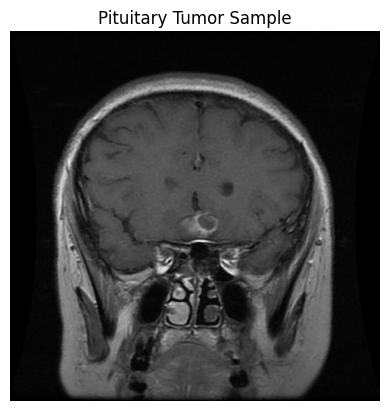

In [83]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')

# Display it
plt.imshow(img)
plt.axis('off')  # Optional: hides the axis
plt.title("Pituitary Tumor Sample")
plt.show()


In [92]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and resize image to match model input
img_path = '/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg'
img = image.load_img(img_path, target_size=(128, 128))  # model expects 128x128x3

# Step 2: Convert image to array and scale pixels
img_array = image.img_to_array(img)
img_array = img_array / 255.0

# Step 3: Add batch dimension
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 128, 128, 3)

# Step 4: Predict
a = model.predict(img_array)
indices = a.argmax()

# Step 5: Print class
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print("Predicted class:", labels[indices])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: no_tumor


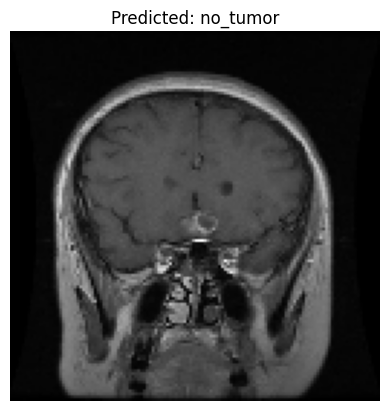

In [93]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {labels[indices]}")
plt.show()


In [95]:
model.save('/kaggle/working/braintumor_model.h5')
